## Gather

### 1. The WeRateDogs Twitter archive

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

### 2. The Tweet image predictions

In [3]:
import requests
from io import BytesIO

In [4]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
image_predictions = pd.read_csv(BytesIO(data.content), sep = '\t')

In [6]:
image_predictions.to_csv('image-predictions.tsv', sep='\t', )

### 3. Retweet count and favorite count data

In [7]:
import json
import tweepy

In [8]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

## Assess


In [9]:
tweet_api_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37996,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8300,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32615,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6128,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24559,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4059,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41323,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8441,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39505,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",19854,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,3042,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11604,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,2014,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",64071,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,18404,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27261,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,4176,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31285,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,7198,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2340 non-null object
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null bool
full_text                        2340 non-null object
geo                              0 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [11]:
tweet_api_data.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2340.000000,2.340000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2340.000000
mean,7948.772650,7.422176e+17,7.440692e+17,2.040329e+16,8.113972e+17,2922.045299
std,12311.859238,6.832564e+16,7.524295e+16,1.260797e+17,6.295843e+16,4922.595228
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1372.250000,6.783394e+17,6.757073e+17,3.589728e+08,7.761338e+17,586.500000
50%,3455.000000,7.186224e+17,7.032559e+17,4.196984e+09,8.281173e+17,1364.000000
75%,9726.250000,7.986954e+17,8.233264e+17,4.196984e+09,8.637581e+17,3403.250000
max,163981.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,83427.000000


In [12]:
tweet_api_data.possibly_sensitive.value_counts()

False    2205
Name: possibly_sensitive, dtype: int64

In [13]:
tweet_api_data.possibly_sensitive_appealable.value_counts()

False    2205
Name: possibly_sensitive_appealable, dtype: int64

In [14]:
tweet_api_data.duplicated(subset=['id']).any()

False

In [15]:
tweet_api_data.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [16]:
tweet_api_data.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [17]:
tweet_api_data[tweet_api_data.retweeted_status.notnull()].retweeted_status[31]

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': 'Oakland Athletics 🌳🐘⚾️',
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the nine-time World Series champion Athletics 

In [18]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
image_predictions.duplicated(subset=['tweet_id']).any()

False

In [22]:
image_predictions.duplicated(subset=['jpg_url']).any()

True

In [23]:
twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [24]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
twitter_archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
twitter_archives.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [27]:
twitter_archives.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [28]:
twitter_archives.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [29]:
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
twitter_archives[twitter_archives['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8,10,Hank,None,None,None,None


In [31]:
twitter_archives[twitter_archives['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


#### Quality
`tweet_api_data` table
- Have unrelated column like user, favorited, retweeted which is based
on the personal user information who obtain the data from API
- Have column in which all data is null: contributors, coordinates, geo, place, quoted status id, and quoted status id str
- Source column contain the whole html tag `<a href=" ... " >`
- possibly_sensitive and possibly_sensitive_appealable column is all zero

`image_predictions` table
- p1, p2, p3 whitespace usage is not standardized, some uses `-`, some uses `_`, some are capitalized, some are not.

`twitter_archive` table
- the dog name may not be accurate, some names are `a` or `an`
- the dog name have None string that should be a null instead
- Column name doggo, floofer, puppo, and pupper has value either None or its column name
- Some rating are wrong, it is marked by the denominator is not 10. One of the tweets sound like this : "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10". However, the captured rating was 7/11 instead of 10/10
- Some rating_numerator also captures wrong data, spotted by having the value less than 10.
- the timestamp should be put as datetime instead of string

#### Tidiness
- the p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in `image_predictions`
- created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in `tweet_api_data`  table and `twitter_archive` table
- `tweet_api_data` and `image_predictions` should be part of `twitter_archive` table
- Entities data seems to contain image information which are already contained in the twitter archive data, like the image_url and extended url
- Extended entities column contains duplicate information of the entities column

## Clean

In [32]:
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

### Tidiness

#### Some tweets in the tweet_api_data are retweets. 

#### Define
Create a dataframe for the real tweet data from the `retweeted_status`, remove tweets that are actually a retweet, remove `retweeted_status` from the tweet_api_data, and concatenate the real tweet data to the tweet_api_data.

#### Code

In [33]:
real_tweet_data_from_retweet = tweet_api_data_clean[tweet_api_data_clean.retweeted_status.notnull()].retweeted_status
real_tweet_data_from_retweet = pd.DataFrame(real_tweet_data_from_retweet.tolist())


In [34]:
tweet_api_data_clean = tweet_api_data_clean[tweet_api_data_clean.retweeted_status.isnull()]

tweet_api_data_clean = tweet_api_data_clean.drop(['retweeted_status'], axis=1)

In [35]:
tweet_api_data_clean = tweet_api_data_clean.append(real_tweet_data_from_retweet)

#### Test

In [36]:
tweet_api_data_clean.shape[0] == tweet_api_data.shape[0]

True

#### The p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in `image_predictions`

#### Define
Put the p1_dog, p2_dog, p3_dog in separate table called `prediction_is_dog_clean` with columns prediction and is_dog. After that, remove the p1_dog, p2_dog, p3_dog from the image_predictions data

#### Code

In [37]:
prediction_is_dog_clean = pd.DataFrame()
temp = pd.DataFrame()

In [38]:

col_to_put_in = ['p1','p2', 'p3']

for col in col_to_put_in:
    temp = pd.DataFrame()
    temp['prediction'] = image_predictions_clean[col]
    temp['is_dog'] = image_predictions_clean[col+'_dog']
    if (col == 'p1'):
        prediction_is_dog_clean = temp
    else:
        prediction_is_dog_clean.append(temp)

In [39]:
prediction_is_dog_clean.drop_duplicates(inplace=True)

In [40]:
image_predictions_clean = image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

#### Test

In [41]:
prediction_is_dog_clean.duplicated(['prediction']).any()

False

In [42]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p2          2075 non-null object
p2_conf     2075 non-null float64
p3          2075 non-null object
p3_conf     2075 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


#### created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in `tweet_api_data`  table and `twitter_archive` table

#### Define 
Drop the timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id in the twitter_archives

#### Code

In [43]:
twitter_archives_clean = twitter_archives_clean.drop([
    'timestamp', 'text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [44]:
all_columns = pd.Series(list(tweet_api_data_clean) + list(twitter_archives_clean))
all_columns[all_columns.duplicated()]

Series([], dtype: object)

#### `tweet_api_data` and `image_recognition` should be part of `twitter_archive`

#### Define
Merge the *tweet_api_data* and *image_recognition* table to the `twitter_archive` table, joining on *tweet_id* and *id*.

#### Code

In [45]:
twitter_archives_clean = pd.merge(tweet_api_data_clean, twitter_archives_clean,
                            left_on='id', right_on='tweet_id', how='right')

In [46]:
twitter_archives_clean = twitter_archives_clean.drop([
    'tweet_id'], axis=1)

In [47]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 42 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2317 non-null object
display_text_range               2317 non-null object
entities                         2317 non-null object
extended_entities                2124 non-null object
favorite_count                   2317 non-null float64
favorited                        2317 non-null object
full_text                        2317 non-null object
geo                              0 non-null object
id                               2317 non-null float64
id_str                           2317 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-nu

In [48]:
twitter_archives_clean = pd.merge(twitter_archives_clean, image_predictions_clean, left_on='id', right_on='tweet_id', how='left')

#### Test

In [49]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 51 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2317 non-null object
display_text_range               2317 non-null object
entities                         2317 non-null object
extended_entities                2124 non-null object
favorite_count                   2317 non-null float64
favorited                        2317 non-null object
full_text                        2317 non-null object
geo                              0 non-null object
id                               2317 non-null object
id_str                           2317 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-nul

### Quality

#### Remove columns whose values are all empty or similar

#### Define
Drop column user, favorited, retweeted, contributors, coordinates, geo, place, quoted status id, and quoted status id str

#### Code

In [50]:
twitter_archives_clean = twitter_archives_clean.drop([
    'user', 'favorited', 'retweeted', 'contributors', 
    'coordinates', 'geo', 'place', 'quoted_status_id', 
    'quoted_status_id_str'], axis=1)

#### Test

In [51]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 42 columns):
created_at                       2317 non-null object
display_text_range               2317 non-null object
entities                         2317 non-null object
extended_entities                2124 non-null object
favorite_count                   2317 non-null float64
full_text                        2317 non-null object
id                               2317 non-null object
id_str                           2317 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2317 non-null object
lang                             2317 non-null object
possibly_sensitive               2259 non-null object
possibly_sensitive_appealable    225

#### `twitter_archives_clean`: Column name doggo, floofer, puppo, and pupper has value either None or its column name

#### Define
Change the value of the column names mentioned above to be True or False

#### Code

In [52]:
def use_true_or_false_for_column(archive, col_name):
    if archive[col_name] == col_name:
        return True
    else:
        return False
    
twitter_archives_clean['doggo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('doggo',), axis=1)
twitter_archives_clean['floofer'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('floofer',), axis=1)
twitter_archives_clean['puppo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('puppo',), axis=1)
twitter_archives_clean['pupper'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('pupper',), axis=1)

#### Test

In [53]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 42 columns):
created_at                       2317 non-null object
display_text_range               2317 non-null object
entities                         2317 non-null object
extended_entities                2124 non-null object
favorite_count                   2317 non-null float64
full_text                        2317 non-null object
id                               2317 non-null object
id_str                           2317 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
is_quote_status                  2317 non-null object
lang                             2317 non-null object
possibly_sensitive               2259 non-null object
possibly_sensitive_appealable    225

#### `possibly_sensitive` and `possibly_sensitive_appealable` contain same value for all row in `twitter_archives`

#### Define
Drop the `possibly_sensitive` and `possibly_sensitive_appealable` column

#### Code

In [54]:
twitter_archives_clean = twitter_archives_clean.drop([
    'possibly_sensitive','possibly_sensitive_appealable'], axis=1)

#### Test

In [55]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 40 columns):
created_at                    2317 non-null object
display_text_range            2317 non-null object
entities                      2317 non-null object
extended_entities             2124 non-null object
favorite_count                2317 non-null float64
full_text                     2317 non-null object
id                            2317 non-null object
id_str                        2317 non-null object
in_reply_to_screen_name       77 non-null object
in_reply_to_status_id         77 non-null float64
in_reply_to_status_id_str     77 non-null object
in_reply_to_user_id           77 non-null float64
in_reply_to_user_id_str       77 non-null object
is_quote_status               2317 non-null object
lang                          2317 non-null object
quoted_status                 24 non-null object
quoted_status_permalink       25 non-null object
retweet_count                 2317 no

#### Source column contain the whole html tag `<a href=" ... " >`

#### Define
Use regular expression to extract only the href part of the link

#### Code

In [56]:
twitter_archives_clean['source'] = twitter_archives_clean.source.str.extract(r'href="(.+?)"')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


#### Test

In [57]:
twitter_archives_clean['source'].value_counts()

http://twitter.com/download/iphone              2171
http://vine.co                                   103
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      10
Name: source, dtype: int64

#### Name of the dog are marked as None instead of nan in `twitter_archives_clean` table

#### Define
Replace None to nan

#### Code

In [58]:
twitter_archives_clean.name.replace('None', np.nan, inplace=True)

#### Test

In [59]:
(twitter_archives_clean.name == 'None').any()

False

#### Some dog have name a, an, and the  in `twitter_archives_clean` table

#### Define
Replace 'a', 'an', 'the' to nan

#### Code

In [60]:
twitter_archives_clean.name.replace(['a', 'an', 'the'], np.nan, inplace=True)

#### Test

In [61]:
(twitter_archives_clean.name == 'a').any()

False

#### Some rows have invalid rating, with rating numerator less than 10 or denominator not equal to 10

#### Define
Drop rows with such occurences

#### Code

In [62]:
twitter_archives_clean = twitter_archives_clean[(twitter_archives_clean.rating_numerator >= 10) & (twitter_archives_clean.rating_denominator == 10)]

#### Test

In [63]:
(twitter_archives_clean.rating_numerator < 10).any()

False

In [64]:
(twitter_archives_clean.rating_denominator != 10).any()

False

In [65]:
with open('twitter_archive_master.csv', 'w') as outfile:  
    outfile.write(twitter_archives_clean.to_csv(index=False))
    
with open('predictions_mapping_master.csv', 'w') as outfile:  
    outfile.write(prediction_is_dog_clean.to_csv(index=False))


## Visualize

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [67]:
twitter_archives = pd.read_csv('twitter_archive_master.csv')

predictions_mappings = pd.read_csv('predictions_mapping_master.csv')


In [68]:
# Setup function needed
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

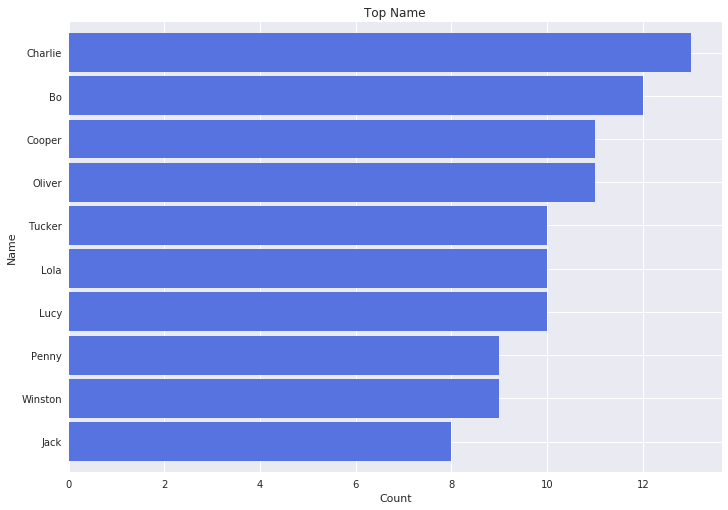

In [69]:
twitter_archives.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Name')
set_label('Count', 'Name')

Based on the above, it seems that Charlie is the most popular name, followed by Bo.

## Is there a correlation between retweet count and favorite count?

Text(0.5,1,'Favorite vs Retweet Count')

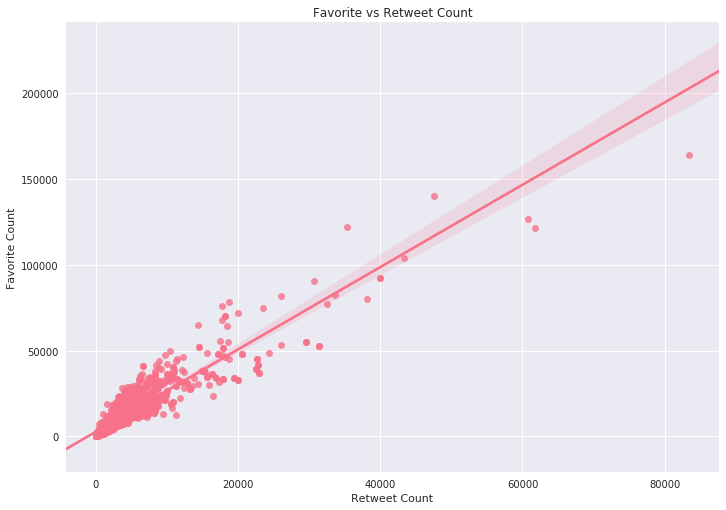

In [70]:
sns.set_palette("husl")
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=twitter_archives)
set_label("Retweet Count", "Favorite Count")

plt.title('Favorite vs Retweet Count')

From the above, it seems like there could be a correlation between favorite count and retweet count.

## Is there any pattern for the rating given in the tweet?

First we try to look at pattern based on the time the tweet was made.

Text(0.5,1,'The median rating of dog tweet per day')

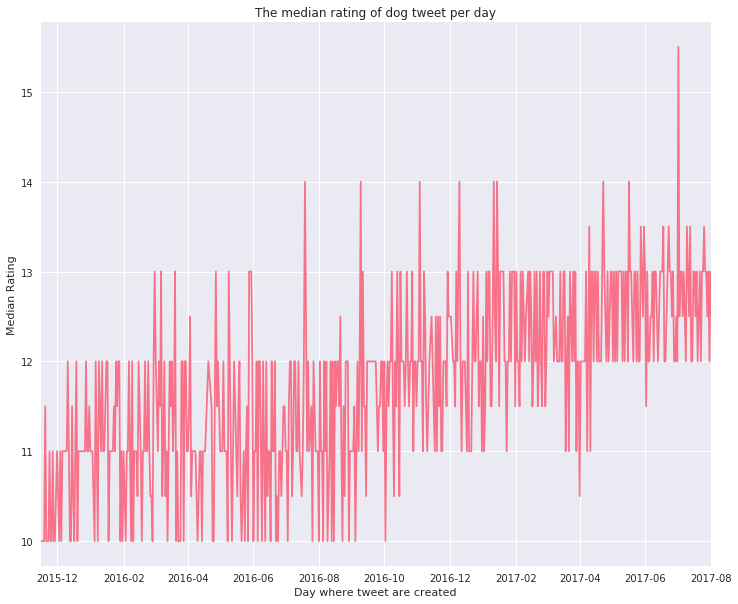

In [71]:
twitter_archives['created_at'] = pd.to_datetime(twitter_archives.created_at)

plt.subplots(figsize=(12,10))
twitter_archives.groupby(twitter_archives['created_at'].dt.date).median()['rating_numerator'].plot()
set_label('Day where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per day')

The above plot, although unclear, seems to indicate an increase in the rating of the dog given. Let's show it more clearly by dividing it to bigger interval.

Text(0.5,1,'The median rating of dog tweet per month')

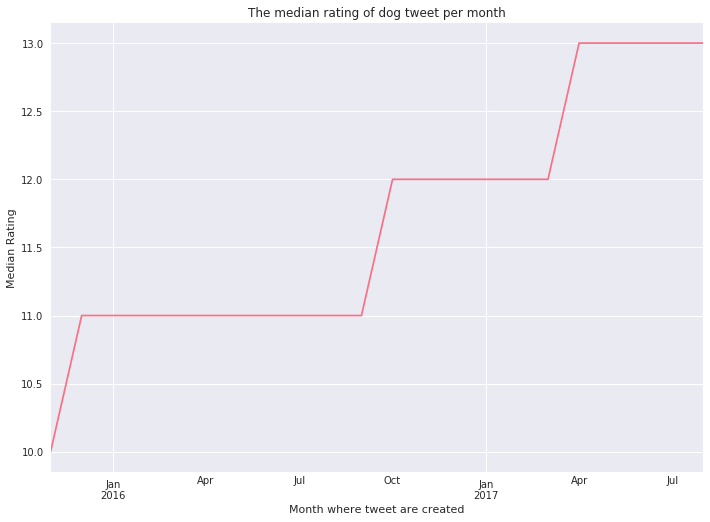

In [72]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['rating_numerator'].plot()
set_label('Month where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per month')

From the above, it seems like the rating given to dogs increases as time goes by. 

## Does @weRateDogs tweets more dog rating as it gains popularity?

Let's first plot the number of tweet data per month.

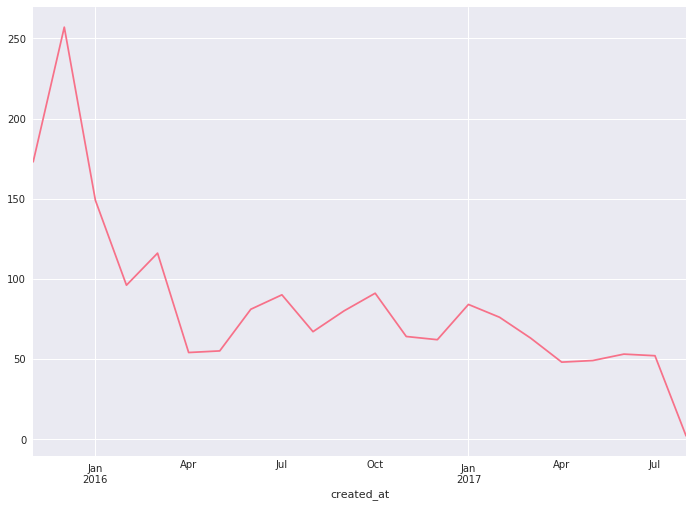

In [73]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).count()['id'].plot()

Ignoring the sharp drop in July 2017, which might be due to the time we gather data, the plot above shows that @weRateDogs does not become more active in rating dogs as the month goes by. Actually, the tweet count has tendency to decrease.

## How about the retweet count and the favorite count per month?

To measure the account popularity, it is better to use the median of the retweet count and favorite count instead of the sum, as median is less affected by outlier and the sum may be affected by the number of tweets made per month, which differs each month.

Text(0.5,1,'Median of Favorite Count and Retweet Count for each month')

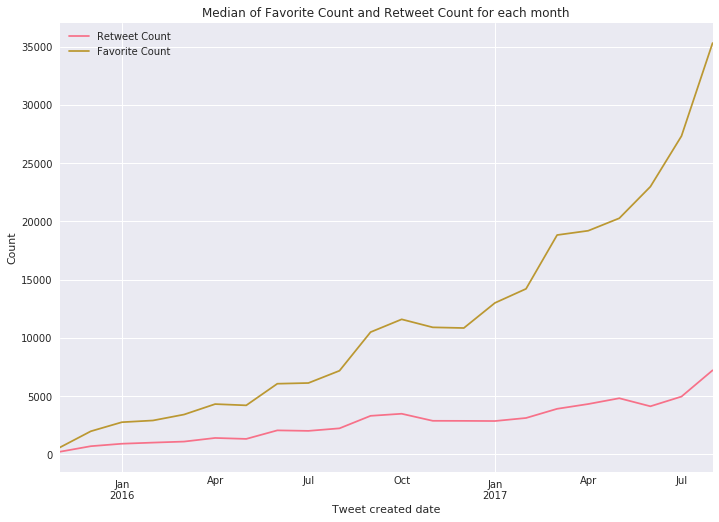

In [74]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count')

plt.legend()
set_label('Tweet created date', 'Count')
plt.title('Median of Favorite Count and Retweet Count for each month')

From the above, we can see that there is tendency for retweet count and favorite count to increase, despite the decrease of the number of dog rating tweet made.


## How confidence is the image prediction?

Text(0,0.5,'Confidence')

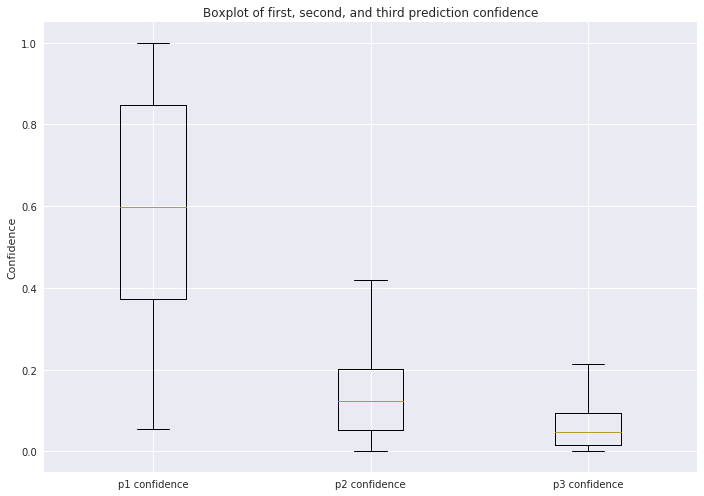

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_archives.p1_conf[twitter_archives.p1_conf.notnull()],
    twitter_archives.p2_conf[twitter_archives.p2_conf.notnull()],
    twitter_archives.p3_conf[twitter_archives.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

From the above, we can see that first prediction tend to have higher confidence than the second and third prediction. We can also see that for the first prediction, the more than 50% of the image has more than 50% confidence.